In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.isnull().sum()

x    0
y    1
dtype: int64

In [4]:
df.dropna(inplace=True)

In [5]:
df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [6]:
df.describe()

,x,y
count,699.000000,699.000000
mean,50.014306,49.939869
std,28.954560,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,100.000000,108.871618


In [7]:
df.shape

(699, 2)

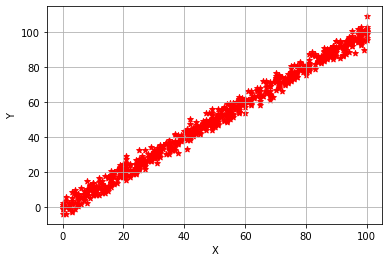

In [8]:
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(df.x,df.y,color='red', marker='*')
plt.grid()
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lr = LinearRegression()

In [10]:
from sklearn.model_selection import train_test_split
X = df[['x']]
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=101)

In [11]:
lr.fit(X_train, y_train)

LinearRegression()

In [12]:
predictions = lr.predict(X_test)
print(predictions)

[80.77065719 45.78896399 52.78530263 86.76751888 71.77536465 43.7900101
 74.7737955  11.80674774 16.80413249 24.79994807 88.76647278 28.79785587
 82.76961109 90.76542668 68.77693381 71.77536465 69.77641076 60.78111822
 88.76647278  9.80779385 98.76124226  2.81145521 94.76333447 50.78634874
  0.81250131 31.79628671 83.76908804 67.77745686 94.76333447 36.79367146
  6.809363   53.78477958  4.8104091  74.7737955  57.78268737 33.79524061
 74.7737955  41.7910562  45.78896399 57.78268737 72.7748416  34.79471756
 87.76699583  3.81093215 96.76228837  1.81197826 99.76071921 20.80204028
 18.80308638 96.76228837 33.79524061 29.79733282 41.7910562  17.80360943
 25.79942502 38.79262535 86.76751888  2.81145521 88.76647278 21.80151723
 94.76333447 53.78477958 10.80727079 57.78268737 83.76908804 85.76804193
 79.77118024 42.79053315 53.78477958  1.81197826 97.76176532  2.81145521
 53.78477958 43.7900101  27.79837892 40.79157925 27.79837892 46.78844094
 49.78687179 23.80047113 67.77745686 14.80517859 89.

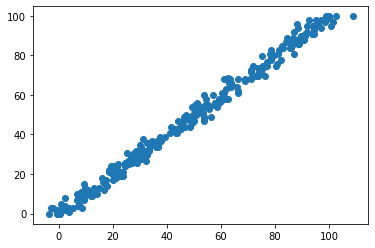

In [13]:
plt.scatter(y_test, predictions)

C:\Users\venki\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='y', ylabel='Density'>

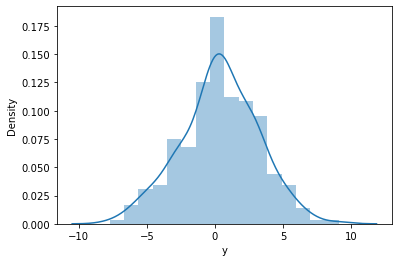

In [14]:
sns.distplot((y_test-predictions))

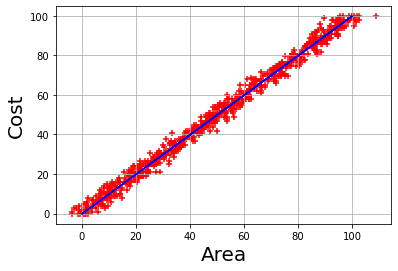

In [15]:
%matplotlib inline
plt.xlabel('Area',fontsize=20)
plt.ylabel('Cost',fontsize=20)
#plt.scatter(df.x,df.y,color='red',marker='*')
plt.scatter(df.y,lr.predict(df[['x']]),color='red',marker='+')
plt.plot(df.x,lr.predict(df[['x']]),color='blue')
plt.grid()


In [16]:
print(metrics.mean_absolute_error(y_test,predictions))

2.23898379765662


In [17]:
print(metrics.mean_squared_error(y_test,predictions))

8.181409881495208


In [18]:
print(np.sqrt(metrics.mean_squared_error(y_test,predictions)))

2.860316395347761


In [19]:
lr.coef_

array([0.99947695])

In [20]:
lr.intercept_

-0.18697563935622696

# Oridnary Least Squares Method

In [21]:
import statsmodels.api as sm
import pandas as pd

df=pd.read_csv("train.csv")

a=df[['x']]
b=df['y']

model=sm.OLS(b,a).fit()
model_prediction=model.predict(a)

model_details=model.summary()
print(model_details)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                     nan
Model:                            OLS   Adj. R-squared (uncentered):                nan
Method:                 Least Squares   F-statistic:                                nan
Date:                Thu, 01 Jul 2021   Prob (F-statistic):                         nan
Time:                        07:06:04   Log-Likelihood:                             nan
No. Observations:                 700   AIC:                                        nan
Df Residuals:                     699   BIC:                                        nan
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------